## Merge file 

In [1]:
import csv
import pandas as pd 

# Generate filenames programmatically
path = "/Volumes/Kingston XS2000 Media/XGBoost_OD_TBBE/XGBoostTBBE/1000simXgb1_2000mData/"
files = [path + "new_final_balance_{}.csv".format(i) for i in range(100)]

merged_filename = "/Volumes/Kingston XS2000 Media/XGBoost_OD_TBBE/XGBoostTraining/StatTestXgb1_2000mNoBal/100simStat_merge_result.csv"

with open(merged_filename, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    
    for index, filename in enumerate(files):
        with open(filename, 'r') as infile:
            reader = csv.reader(infile)
            
            # Skip header only if it's not the first file
            if index != 0:
                next(reader, None)
                
            # Write rows from current file to the output file
            writer.writerows(reader)

## Find average of each betting agents. 

In [2]:
import pandas as pd

# Read the data
df = pd.read_csv(
    "/Volumes/T9/XGBoost_OD_TBBE/XGBoostTraining/StatTestXgb1_2000mNoBal/100simStat_merge_result.csv",
    header=None,
)

# Drop the header row
df = df.drop(0)

# Convert all values to float
df = df.astype(float)

# Define ranges for mapping => to group agents with same type/category
ranges = [ 
    (0, 10, 1),
    (10, 20, 2),
    (20, 30, 3),
    (30, 40, 4),
    (40, 50, 5),
    (50, 55, 6),
    (55, 60, 7)
]

# Create a mapping function based on ranges
def get_mapping(col):
    for start, end, category in ranges:
        if start <= col < end:
            return category

# Create a new DataFrame with mapped columns
mapped_df = df.copy()
mapped_df.columns = [get_mapping(col) for col in df.columns]

# Group by column categories and compute the mean
averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()
averaged_df = averaged_df - 100000000

print(averaged_df)

               1            2          3            4           5  \
1   -2531.602476  8035.037254 -48.180036  -907.500000  185.940109   
2   -1456.461664  -629.264177 -10.500000  -159.660135   66.425807   
3    1459.705359 -1683.450000 -23.550000 -1058.806994   10.050000   
4    -858.825000   293.400000  -9.900000  -168.600000   33.900000   
5   -1048.069678 -1943.941988   2.756614  -895.127809   54.164293   
..           ...          ...        ...          ...         ...   
96  -2347.704747  4961.862505 -14.170521  -210.125071  169.068974   
97   -437.659069  1051.328606   7.040524  -604.352313  112.382823   
98    144.569242  3409.975749 -75.126600  -882.344040  172.623840   
99   -756.093285 -2174.600319  21.415844  -757.791409  -47.497621   
100  -960.229840   604.710745 -27.090114  -449.141136   86.485966   

               6            7  
1    -480.352422 -8987.037280  
2      -0.783020  4379.703356  
3   -4547.253725  7139.356994  
4   -1287.450000  2707.500000  
5    5333.5

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_44088/501785899.py:37: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()


In [4]:
import pandas as pd

# Read the data
df = pd.read_csv(
    "/Volumes/T9/XGBoost_OD_TBBE/XGBoostTraining/StatTestXgb1_2000mNoBal/100simStat_merge_result.csv",
    header=None,
)
# Drop the header row
df = df.drop(0)

# Convert all values to float
df = df.astype(float)

# Define ranges for mapping => to group agents with same type/category
ranges = [
    (0, 10, 1),
    (10, 20, 2),
    (20, 30, 3),
    (30, 40, 4),
    (40, 50, 5),
    (50, 55, 6),
    (55, 60, 7)
]


# Create a mapping function based on ranges
def get_mapping(col):
    for start, end, category in ranges:
        if start <= col < end:
            return category


# Create a new DataFrame with mapped columns
mapped_df = df.copy()
mapped_df.columns = [get_mapping(col) for col in df.columns]

# Group by column categories and compute the mean
averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()
averaged_df = averaged_df - 100000000

# Print the total averaged balance for XGBoost1 and XGBoost2
xgboost1_total_balance = averaged_df.iloc[:, 6].sum()


print("Total Averaged Balance for XGBoost1:", xgboost1_total_balance)

Total Averaged Balance for XGBoost1: 160162.4613380432


/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_44088/1700829980.py:38: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()


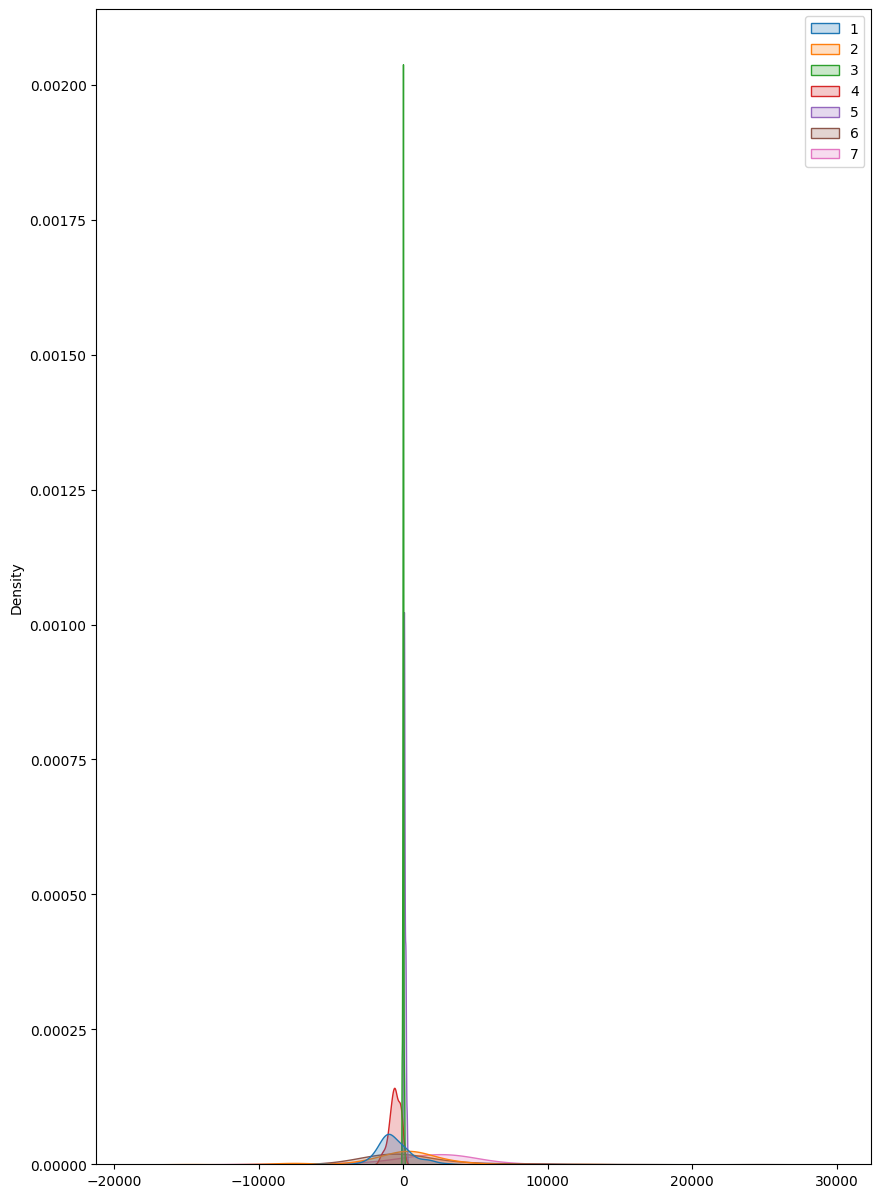

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))
distributionPlot = sns.kdeplot(data=averaged_df,fill=True)
plt.show()


## Statistical Testing

In [6]:
from scipy import stats

xgboost1_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    # Check normality for both columns
    _, pvalue_xgboost1 = stats.shapiro(xgboost1_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost1", pvalue_xgboost1)
    print("pvalue_other_agent ", pvalue_other_agent)
    # If both are normally distributed
    if pvalue_xgboost1 > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_rel(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.wilcoxon(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")

P_value_xgboost1 2.060172211733423e-05
pvalue_other_agent  0.00015654820583928345
not normal
There is a statistically significant difference
P-Value 7.995725055210994e-08

P_value_xgboost1 2.060172211733423e-05
pvalue_other_agent  1.7077239699232492e-08
not normal
There is a statistically significant difference
P-Value 6.367203484431509e-05

P_value_xgboost1 2.060172211733423e-05
pvalue_other_agent  0.0032818266564473425
not normal
There is a statistically significant difference
P-Value 7.915698945664686e-07

P_value_xgboost1 2.060172211733423e-05
pvalue_other_agent  0.005993043846116897
not normal
There is a statistically significant difference
P-Value 6.0921876974906445e-09

P_value_xgboost1 2.060172211733423e-05
pvalue_other_agent  0.00035887791503329356
not normal
There is a statistically significant difference
P-Value 1.9160777611588274e-06

P_value_xgboost1 2.060172211733423e-05
pvalue_other_agent  6.6130781500331955e-12
not normal
There isn't a statistically significant differen

# Stat test with plotting

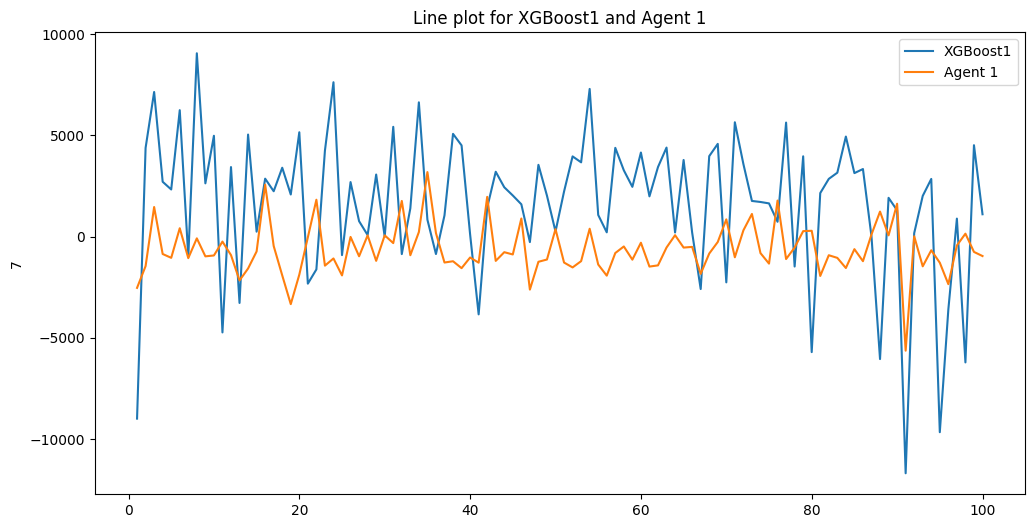

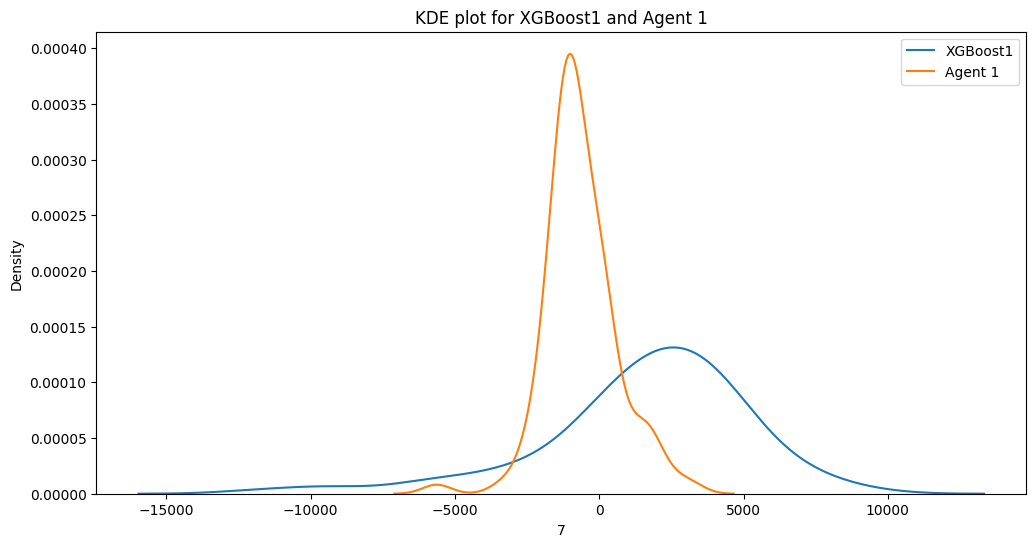

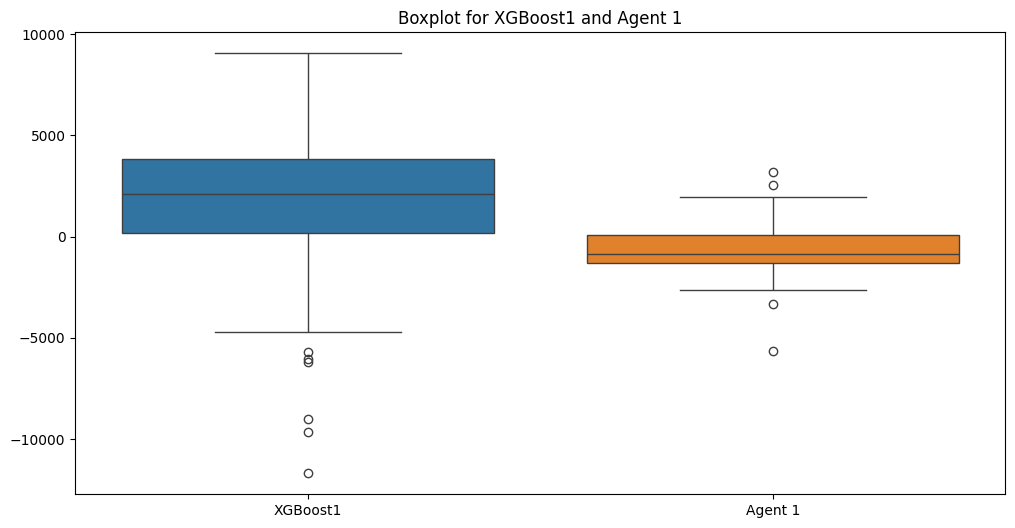

P_value_xgboost1 2.060172211733423e-05
pvalue_other_agent  0.00015654820583928345
not normal
There is a statistically significant difference
P-Value 7.995725055210994e-08



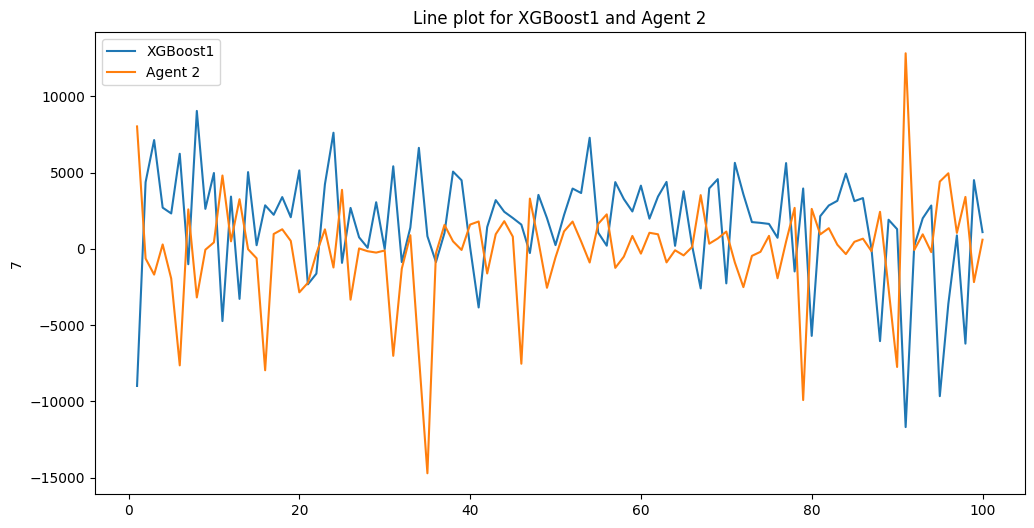

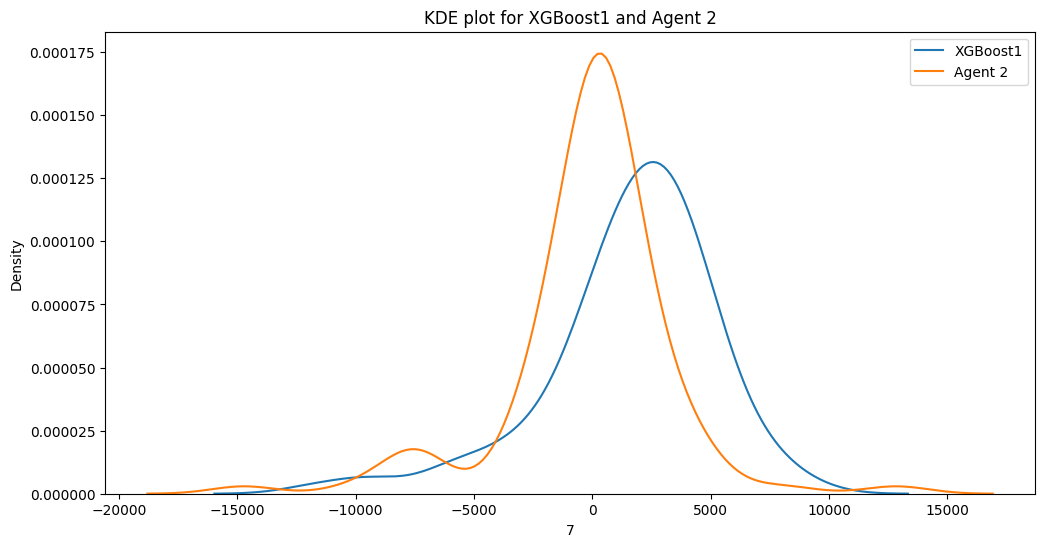

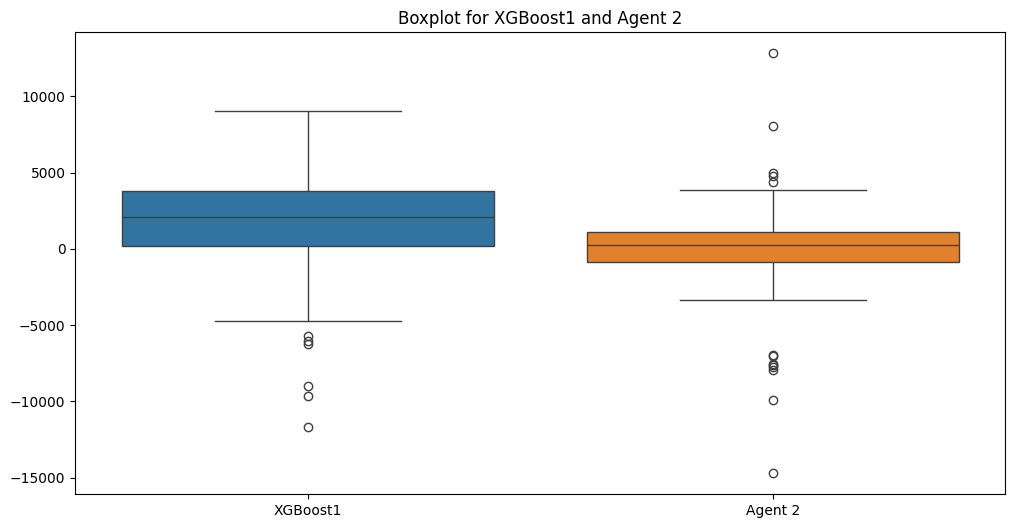

P_value_xgboost1 2.060172211733423e-05
pvalue_other_agent  1.7077239699232492e-08
not normal
There is a statistically significant difference
P-Value 6.367203484431509e-05



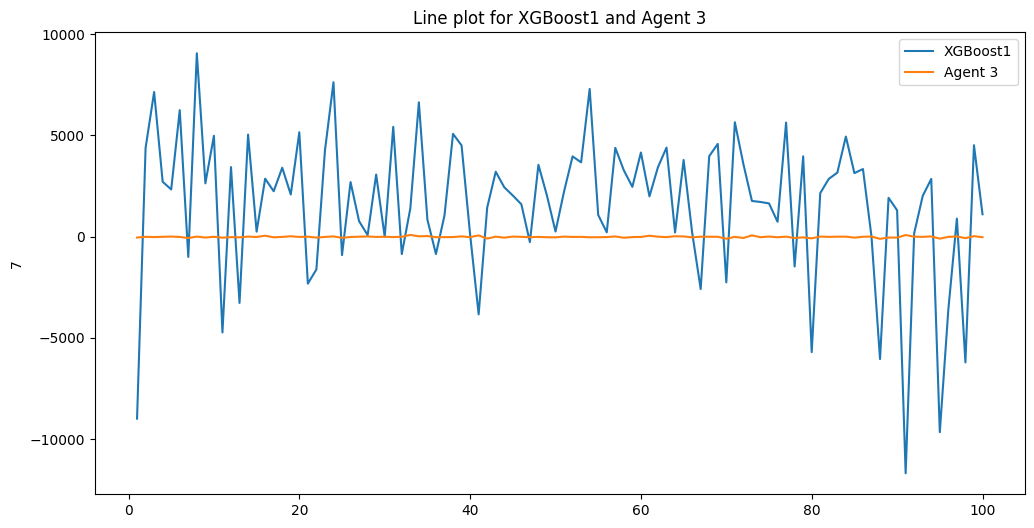

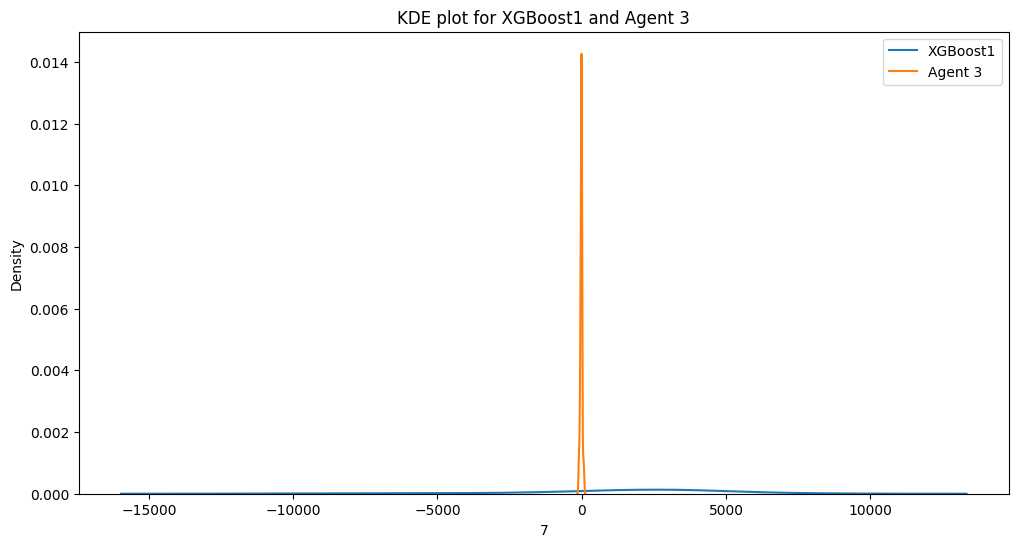

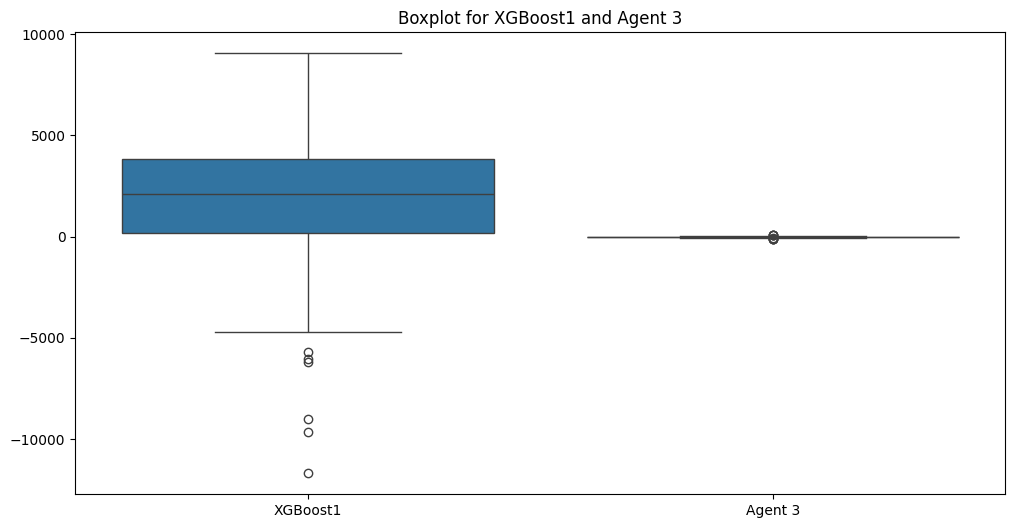

P_value_xgboost1 2.060172211733423e-05
pvalue_other_agent  0.0032818266564473425
not normal
There is a statistically significant difference
P-Value 7.915698945664686e-07



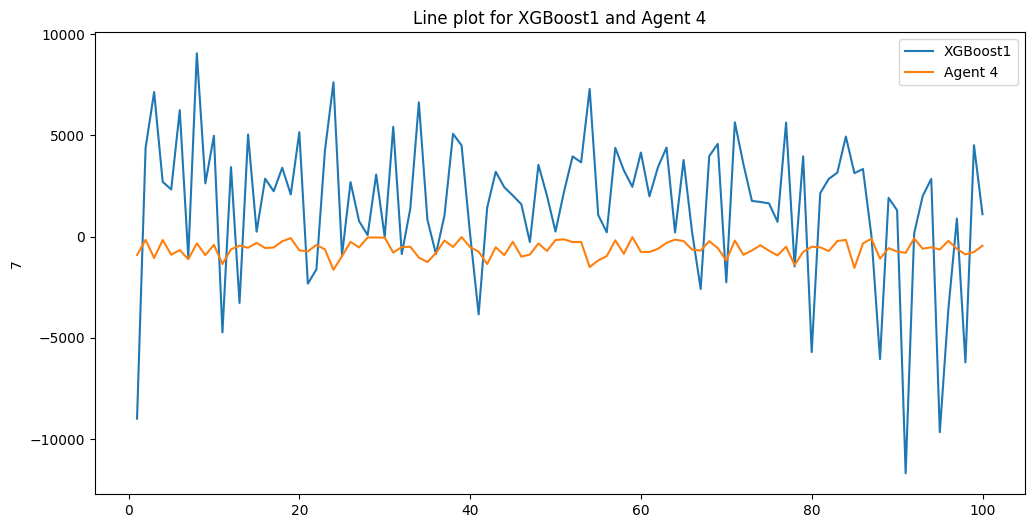

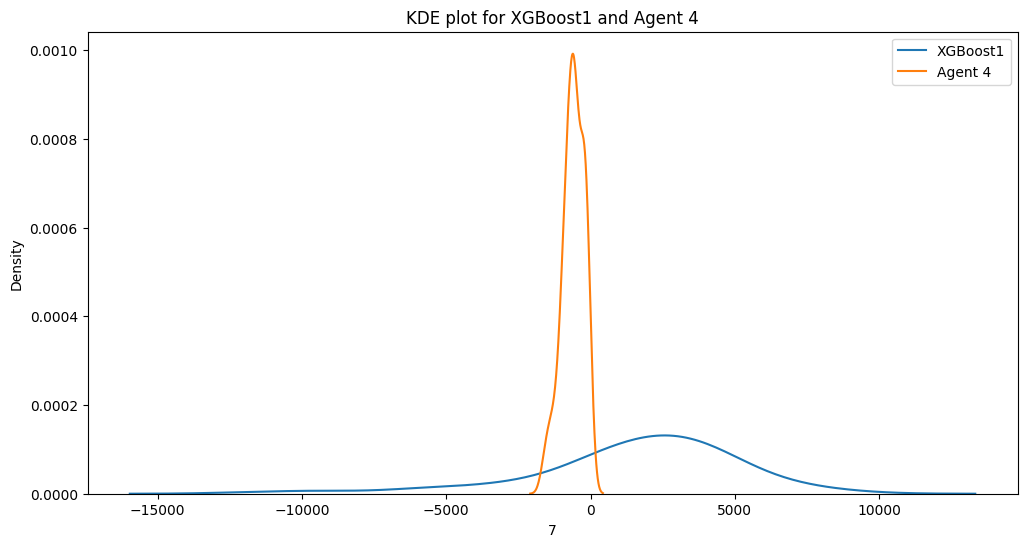

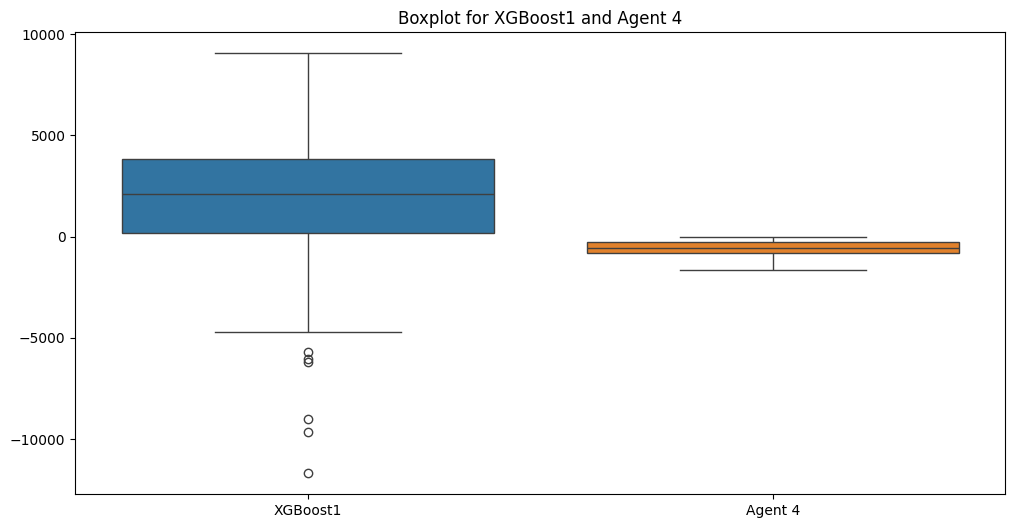

P_value_xgboost1 2.060172211733423e-05
pvalue_other_agent  0.005993043846116897
not normal
There is a statistically significant difference
P-Value 6.0921876974906445e-09



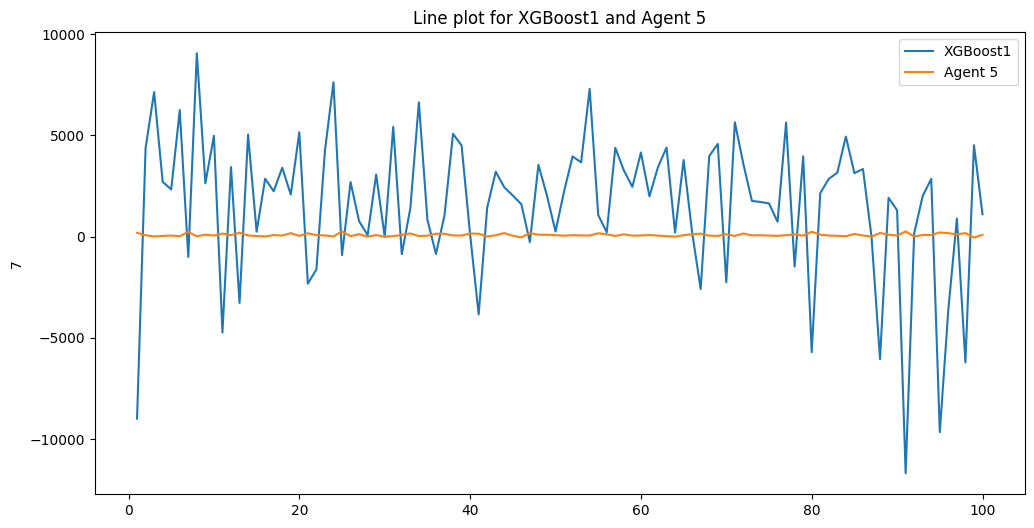

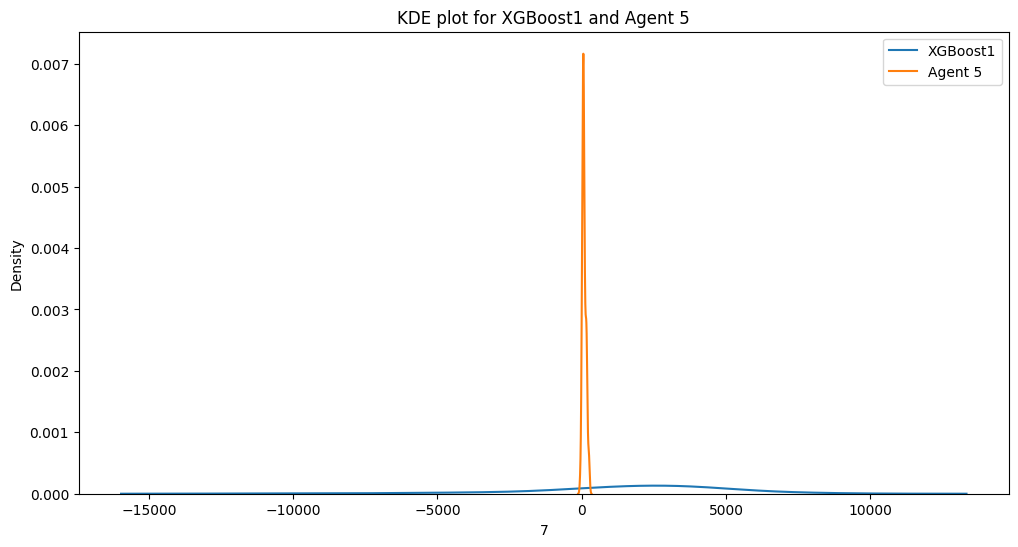

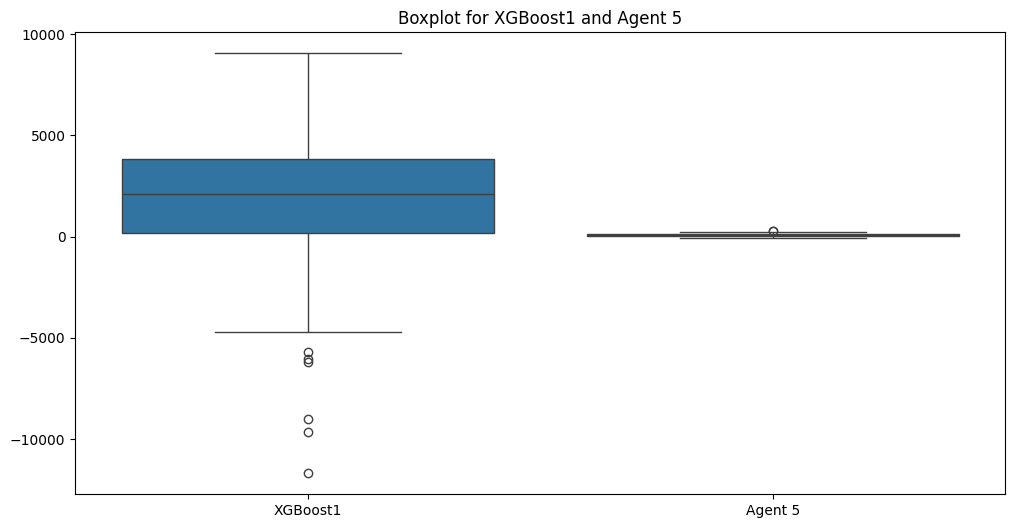

P_value_xgboost1 2.060172211733423e-05
pvalue_other_agent  0.00035887791503329356
not normal
There is a statistically significant difference
P-Value 1.9160777611588274e-06



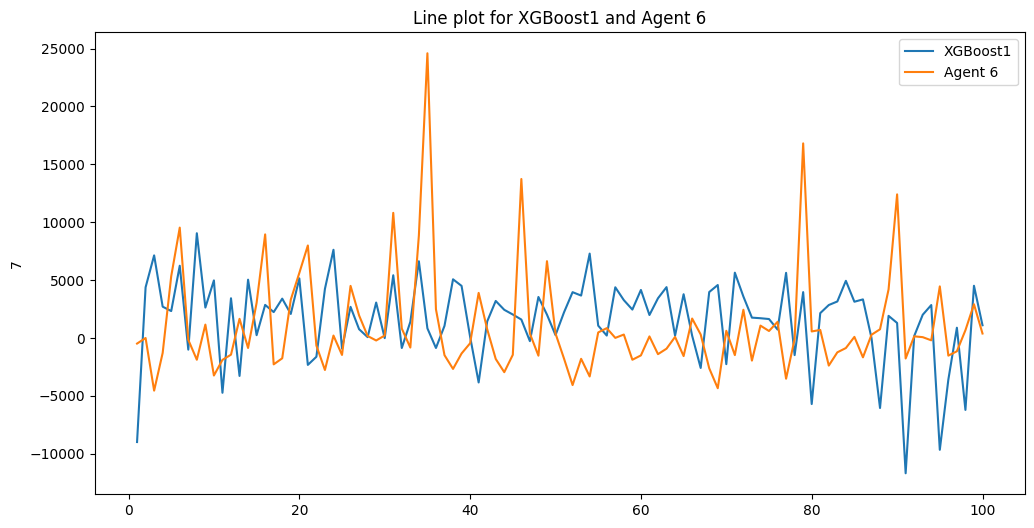

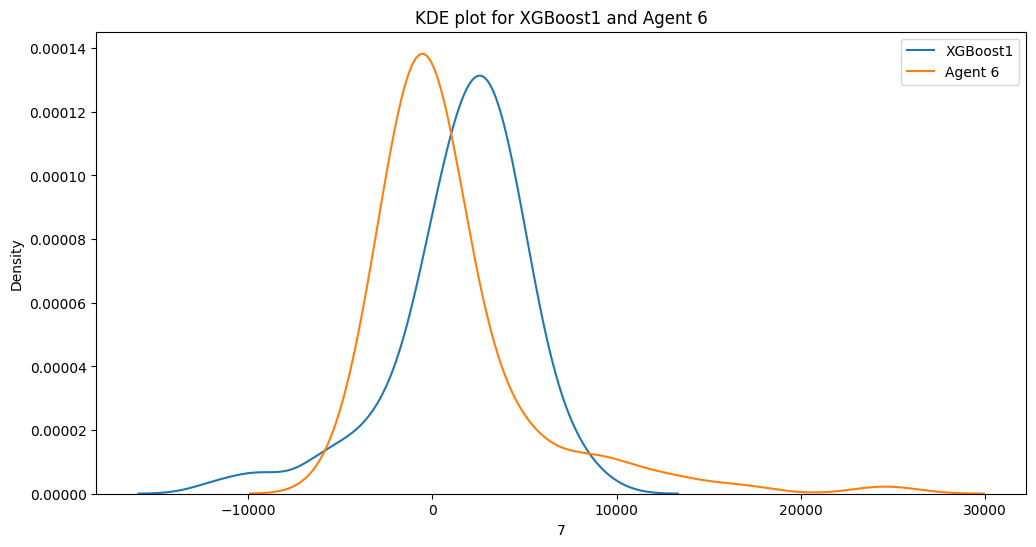

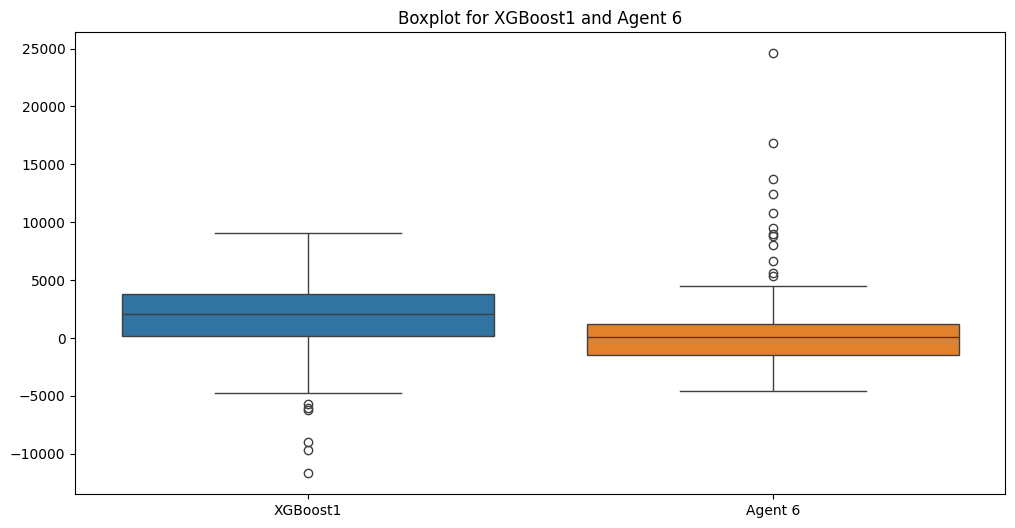

P_value_xgboost1 2.060172211733423e-05
pvalue_other_agent  6.6130781500331955e-12
not normal
There isn't a statistically significant difference


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

xgboost1_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]

    # Line plot for XGBoost and the other agent
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=xgboost1_avg_balance, label="XGBoost1")
    sns.lineplot(data=other_agent_balance, label="Agent " + str(col_index + 1))
    plt.title("Line plot for XGBoost1 and Agent " + str(col_index + 1))
    plt.legend()
    plt.show()

    # KDE plot for the distributions
    plt.figure(figsize=(12, 6))
    sns.kdeplot(xgboost1_avg_balance, label="XGBoost1")
    sns.kdeplot(other_agent_balance, label="Agent " + str(col_index + 1))
    plt.title("KDE plot for XGBoost1 and Agent " + str(col_index + 1))
    plt.legend()
    plt.show()

    # Boxplot for the two distributions
    combined_data = pd.concat(
        [
            xgboost1_avg_balance.rename("XGBoost1"),
            other_agent_balance.rename("Agent " + str(col_index + 1)),
        ],
        axis=1,
    )
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=combined_data)
    plt.title("Boxplot for XGBoost1 and Agent " + str(col_index + 1))
    plt.show()

    # Check normality for both columns
    _, pvalue_xgboost1 = stats.shapiro(xgboost1_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost1", pvalue_xgboost1)
    print("pvalue_other_agent ", pvalue_other_agent)

    # If both are normally distributed
    if pvalue_xgboost1 > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_rel(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.wilcoxon(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")

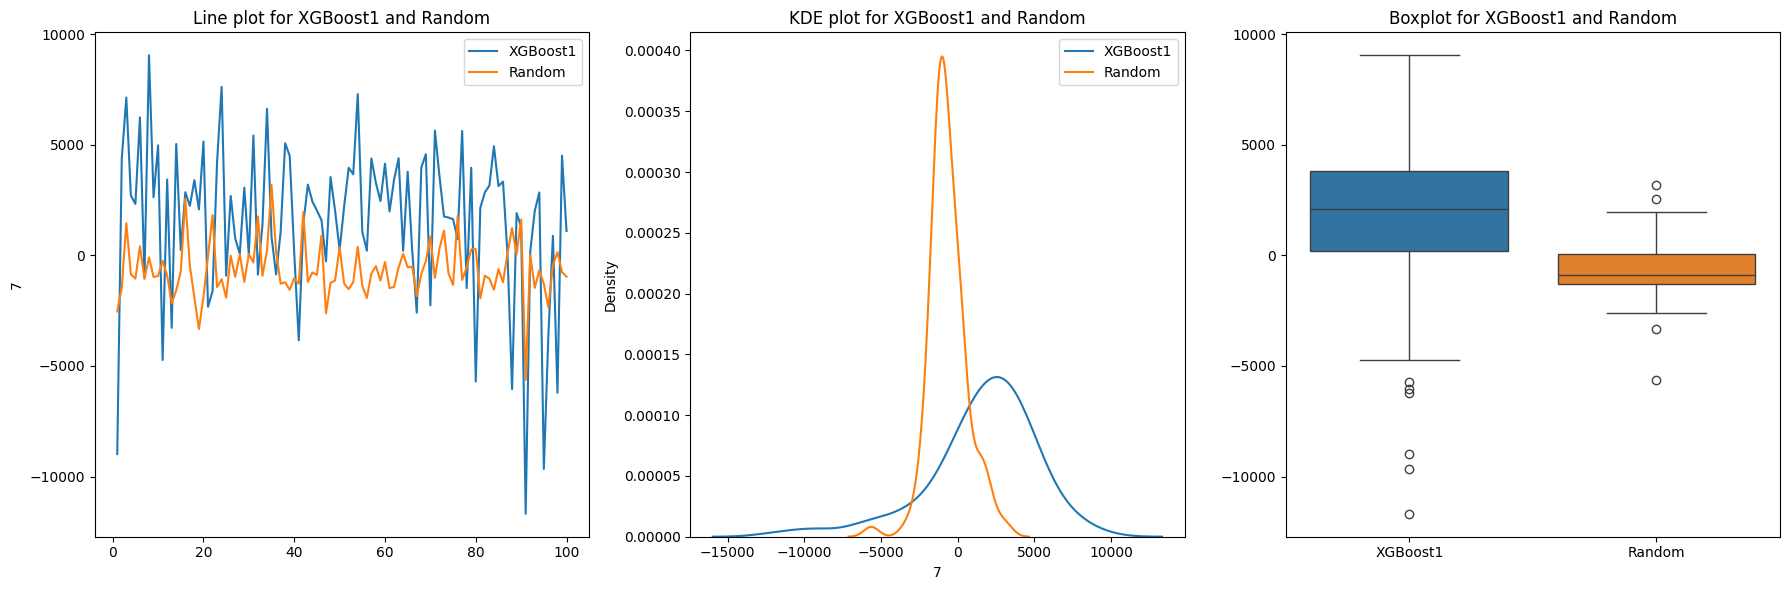

P_value_xgboost1 2.060172211733423e-05
P_value_Random 0.00015654820583928345
not normal
There is a statistically significant difference
P-Value 7.995725055210994e-08



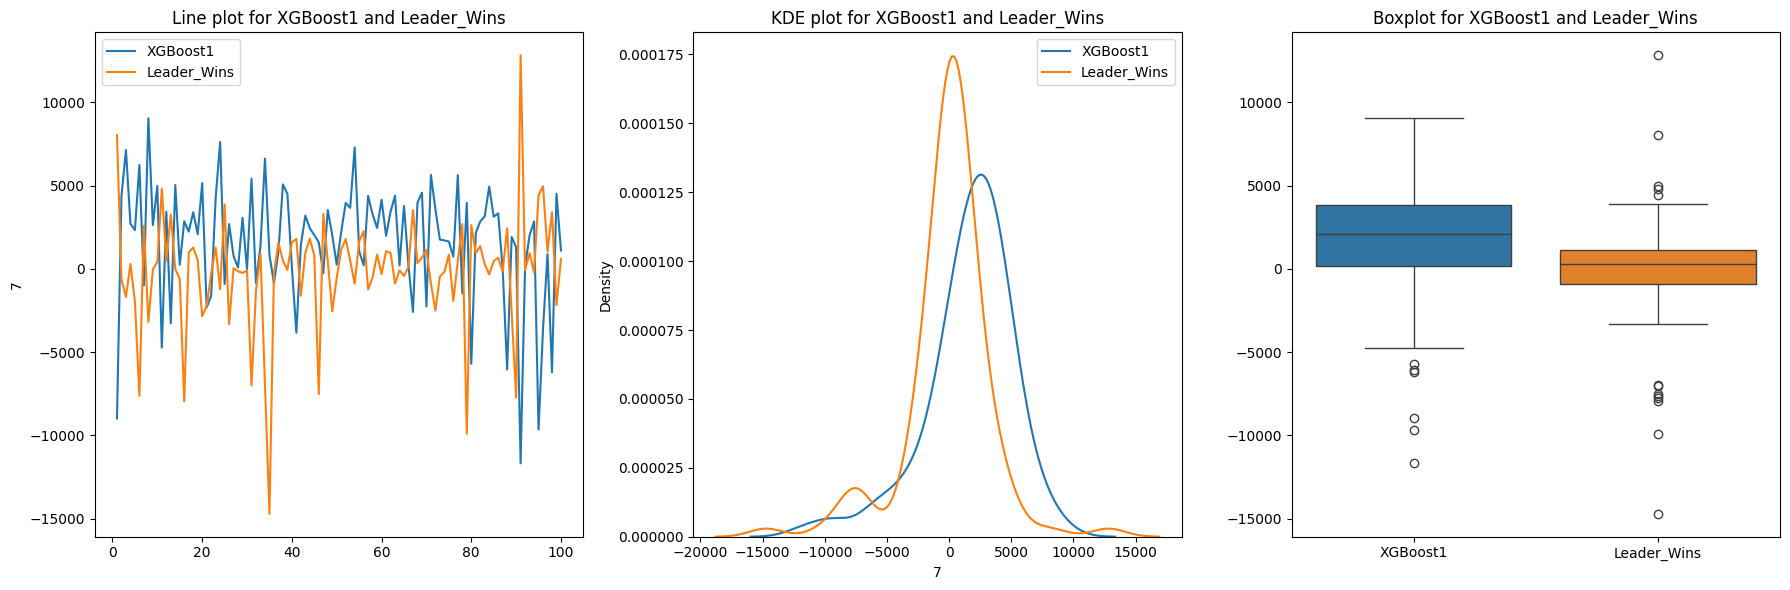

P_value_xgboost1 2.060172211733423e-05
P_value_Leader_Wins 1.7077239699232492e-08
not normal
There is a statistically significant difference
P-Value 6.367203484431509e-05



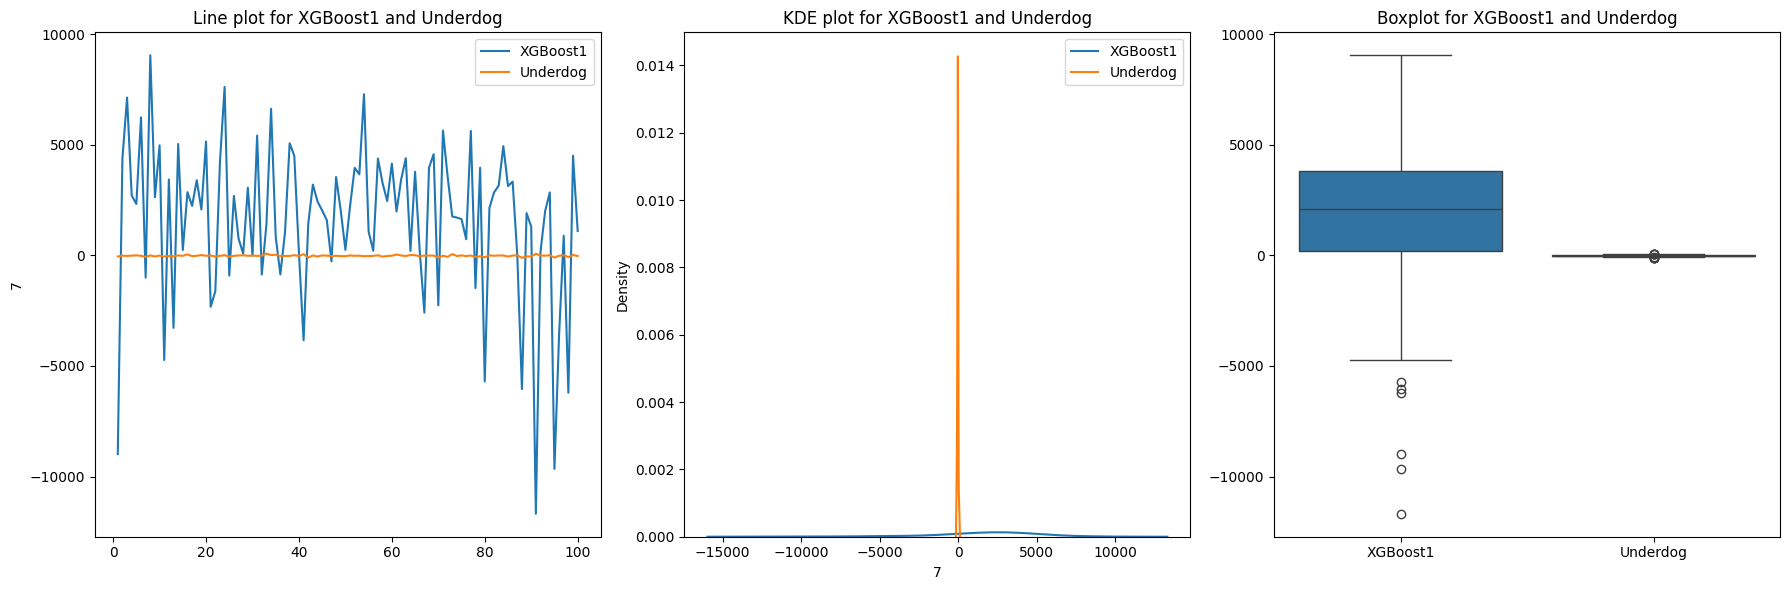

P_value_xgboost1 2.060172211733423e-05
P_value_Underdog 0.0032818266564473425
not normal
There is a statistically significant difference
P-Value 7.915698945664686e-07



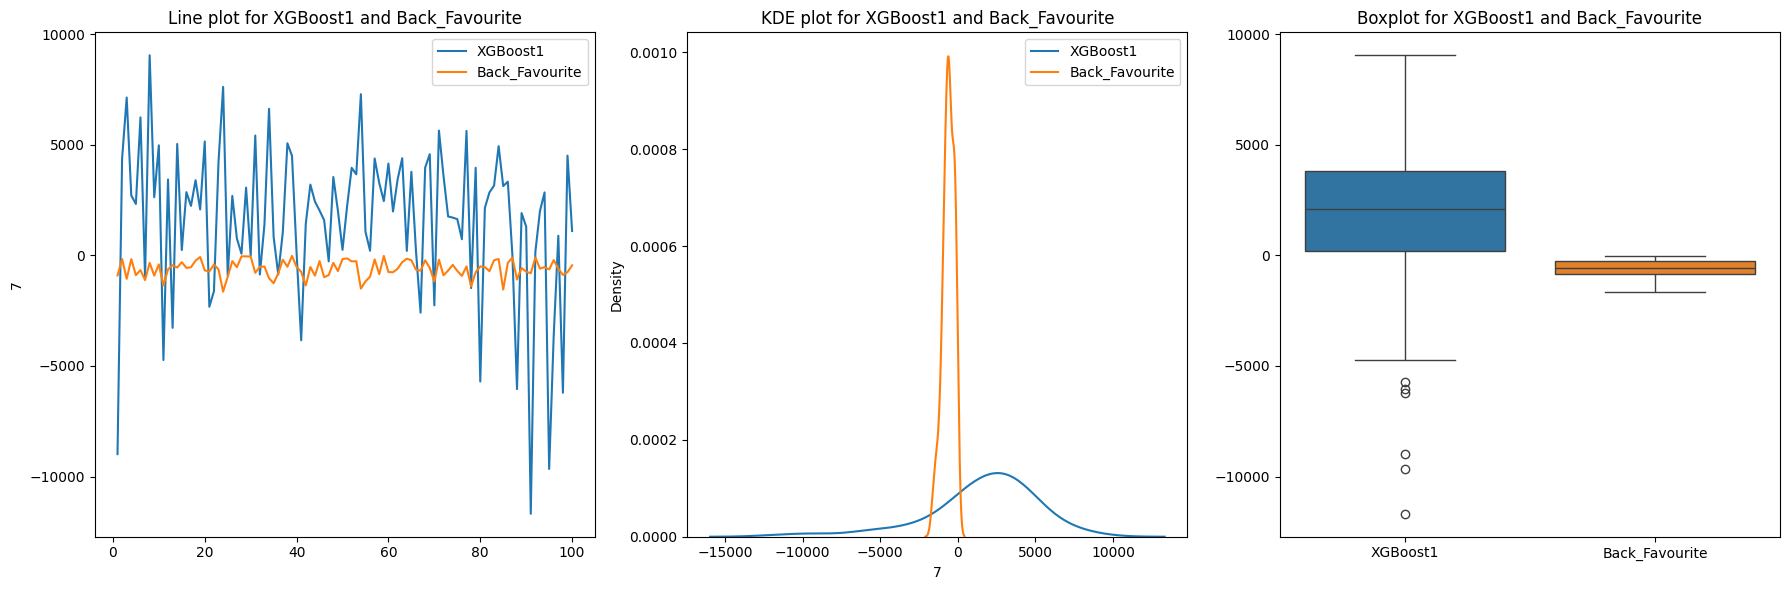

P_value_xgboost1 2.060172211733423e-05
P_value_Back_Favourite 0.005993043846116897
not normal
There is a statistically significant difference
P-Value 6.0921876974906445e-09



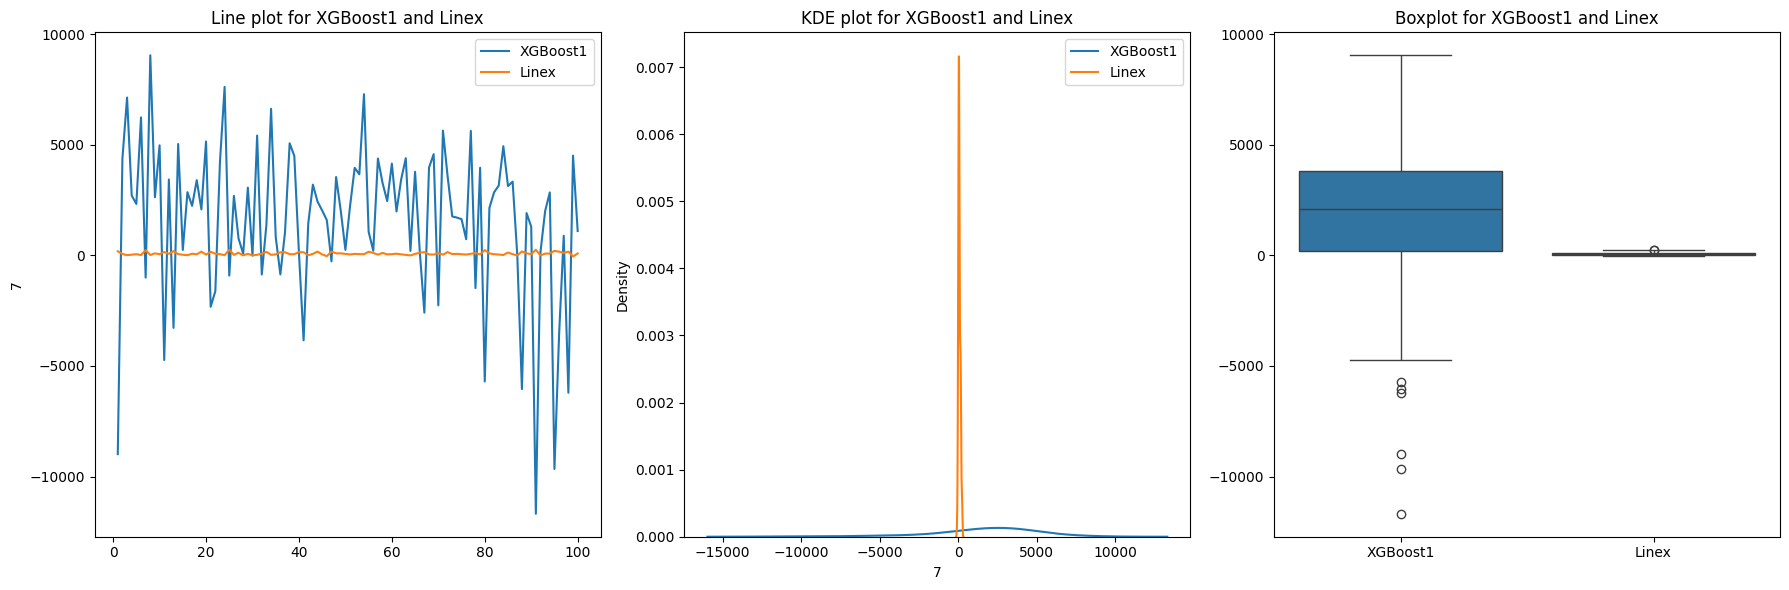

P_value_xgboost1 2.060172211733423e-05
P_value_Linex 0.00035887791503329356
not normal
There is a statistically significant difference
P-Value 1.9160777611588274e-06



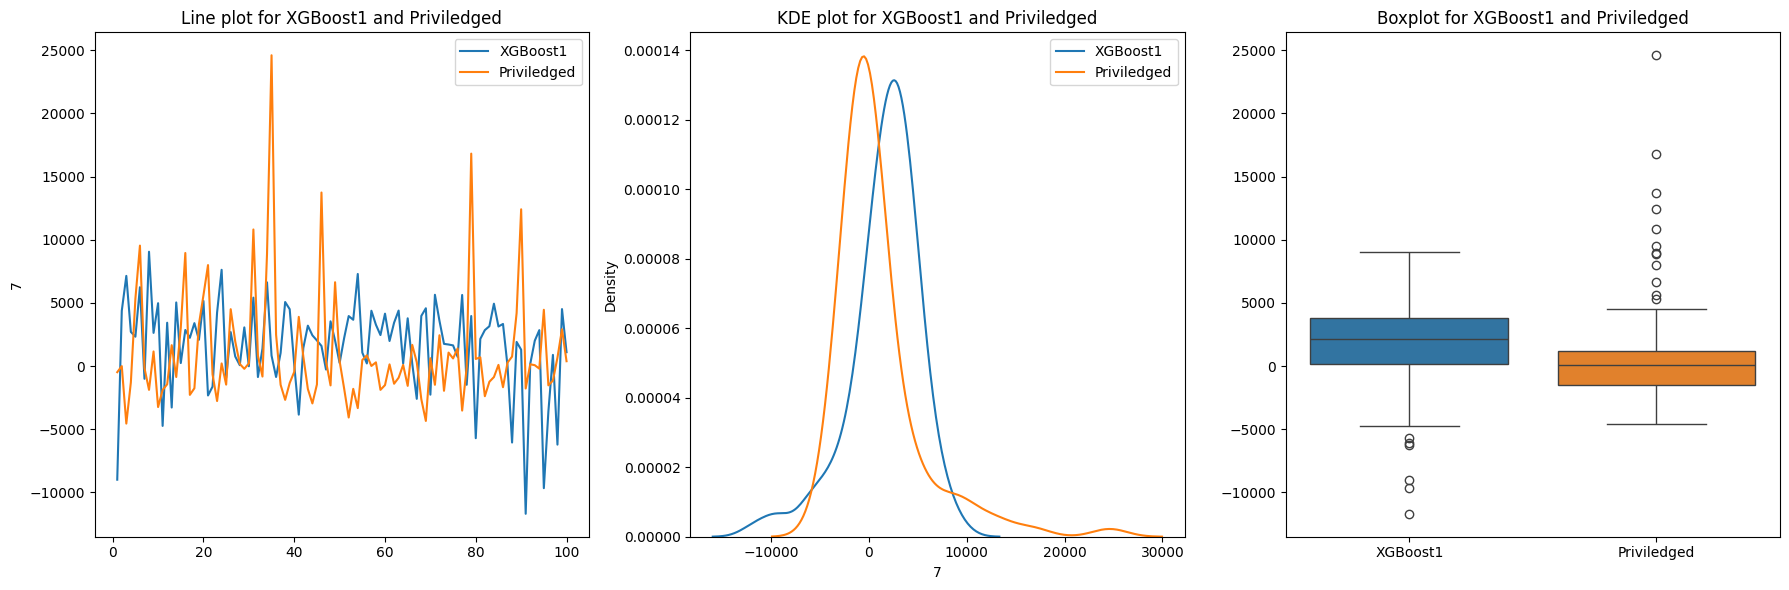

P_value_xgboost1 2.060172211733423e-05
P_value_Priviledged 6.6130781500331955e-12
not normal
There isn't a statistically significant difference


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

xgboost1_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Define agent names for easier access and readability
agent_names = [
    "Random",
    "Leader_Wins",
    "Underdog",
    "Back_Favourite",
    "Linex",
    "Priviledged",
]

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Line plot for XGBoost and the other agent
    sns.lineplot(data=xgboost1_avg_balance, ax=axes[0], label="XGBoost1")
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f"Line plot for XGBoost1 and {agent_name}")
    axes[0].legend()

    # KDE plot for the distributions
    sns.kdeplot(xgboost1_avg_balance, ax=axes[1], label="XGBoost1")
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f"KDE plot for XGBoost1 and {agent_name}")
    axes[1].legend()

    # Boxplot for the two distributions
    combined_data = pd.concat(
        [
            xgboost1_avg_balance.rename("XGBoost1"),
            other_agent_balance.rename(agent_name),
        ],
        axis=1,
    )
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f"Boxplot for XGBoost1 and {agent_name}")

    plt.tight_layout()
    plt.show()

    # Check normality for both columns
    _, pvalue_xgboost1 = stats.shapiro(xgboost1_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost1", pvalue_xgboost1)
    print(f"P_value_{agent_name}", pvalue_other_agent)

    # If both are normally distributed
    if pvalue_xgboost1 > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_rel(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.wilcoxon(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")

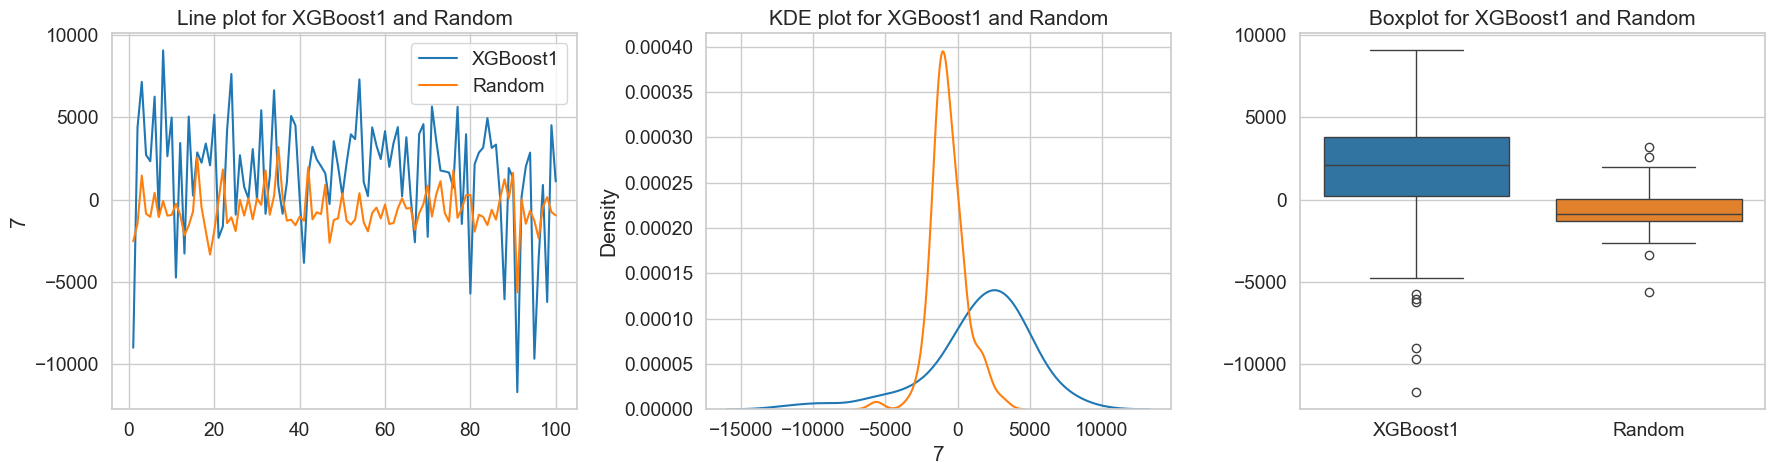

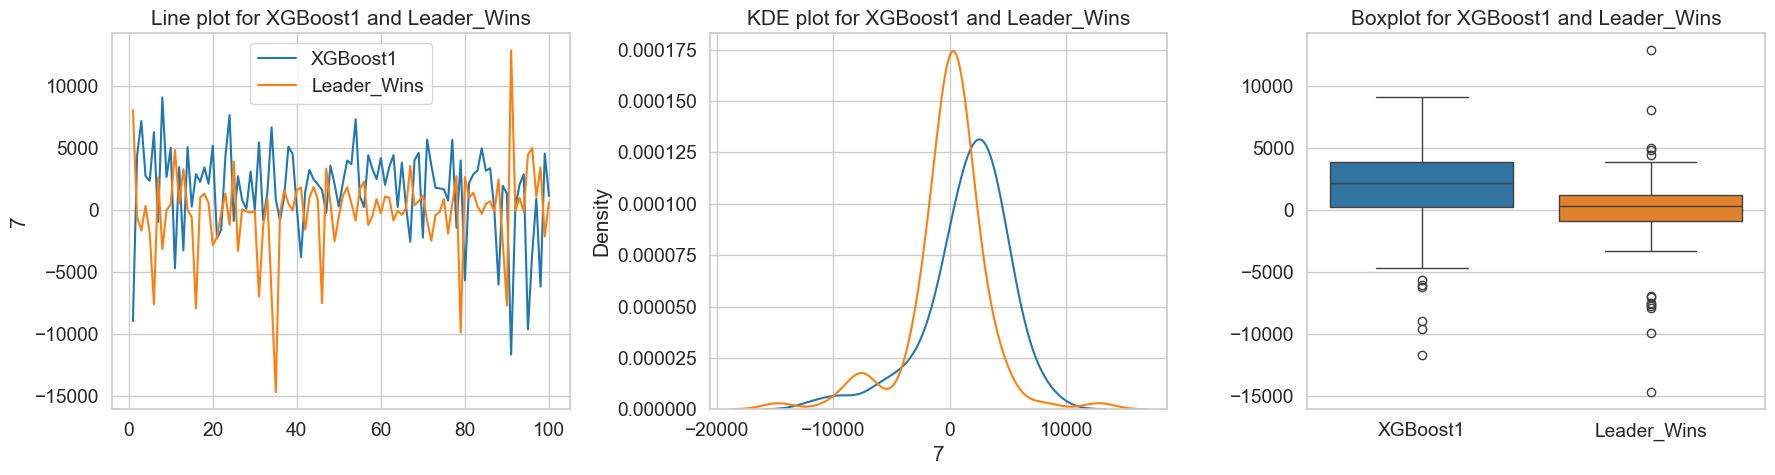

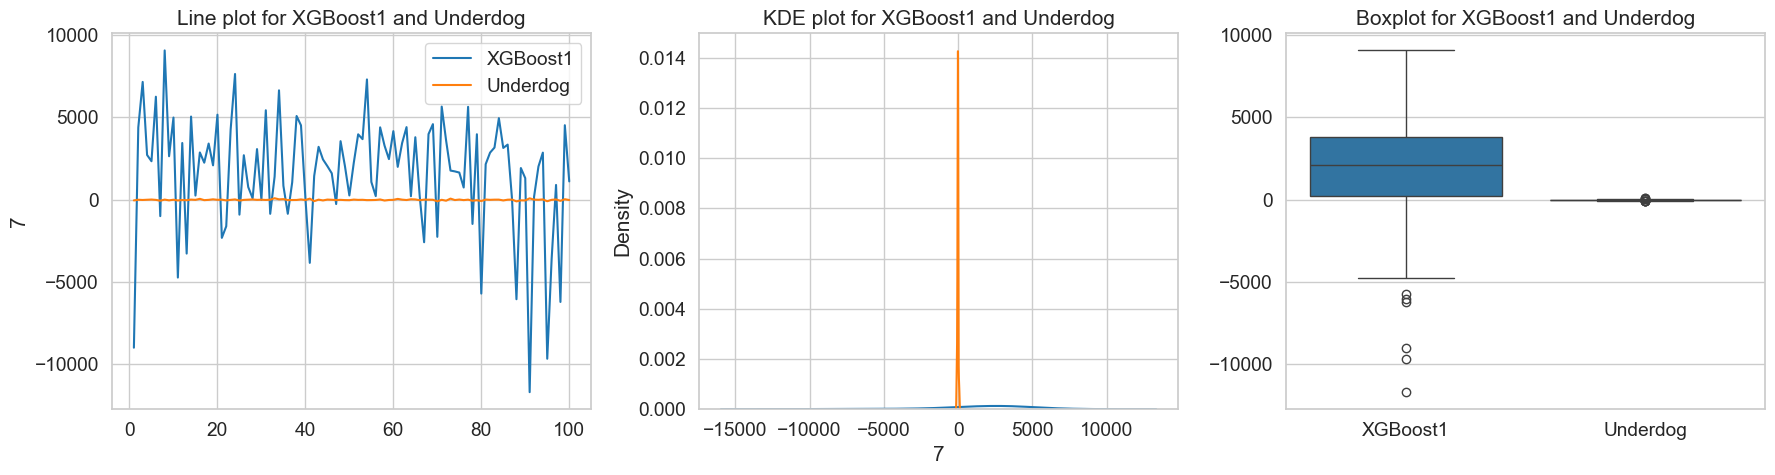

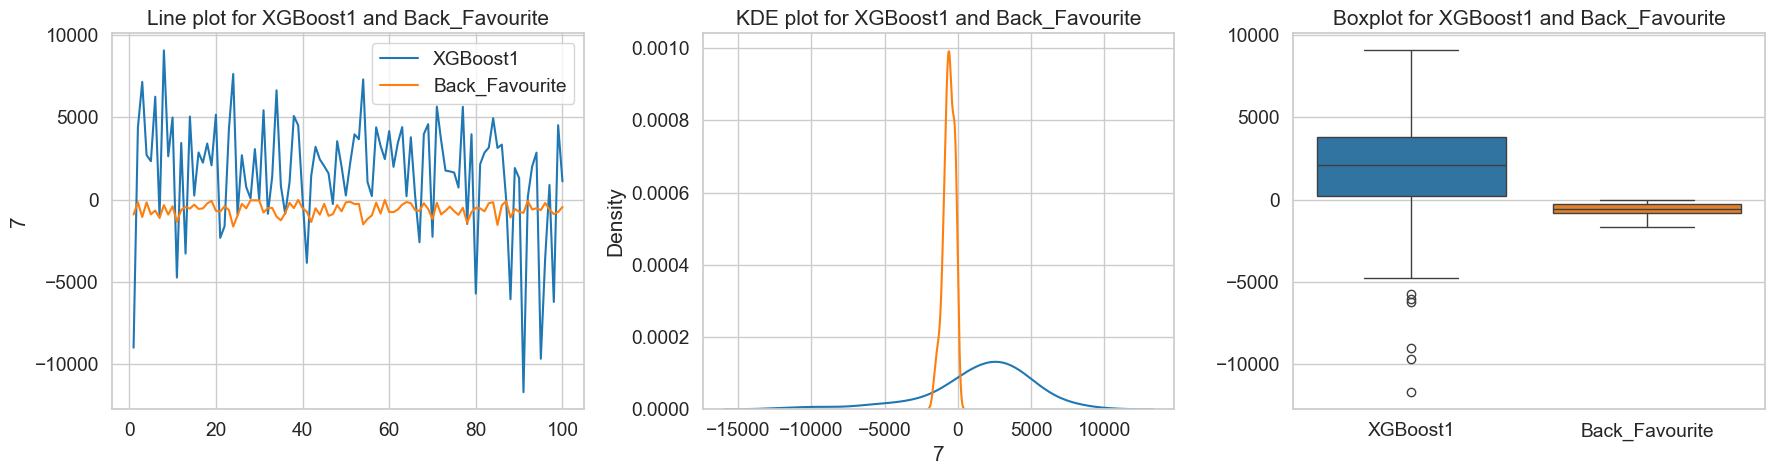

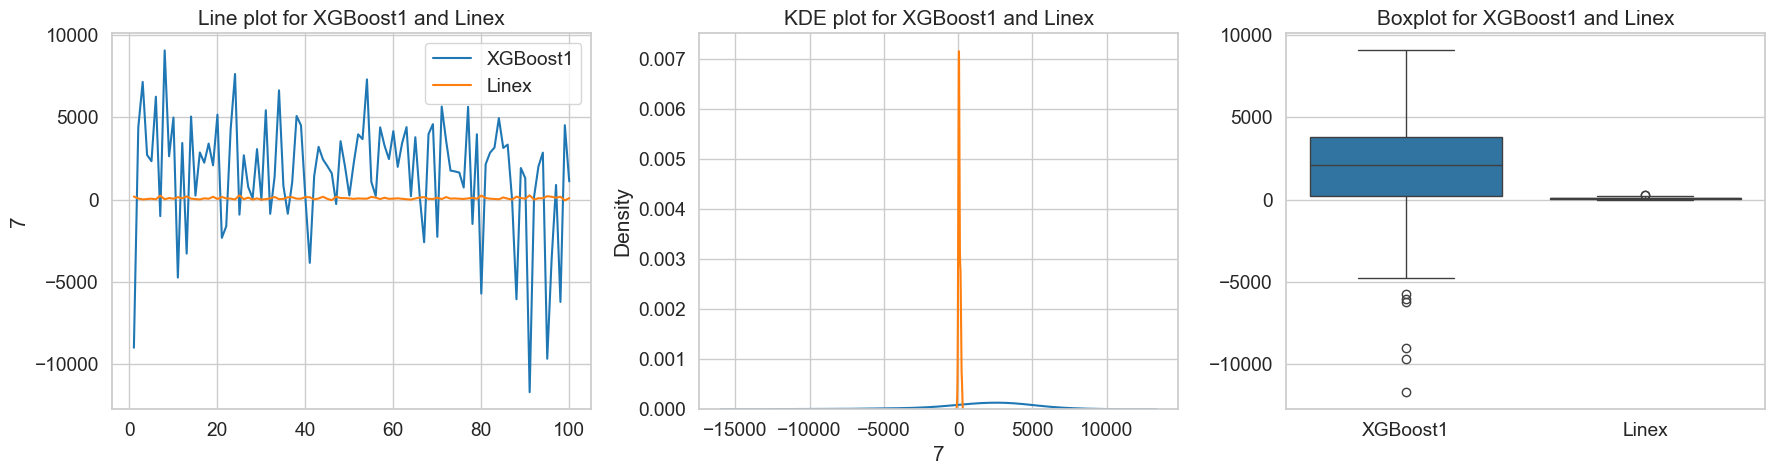

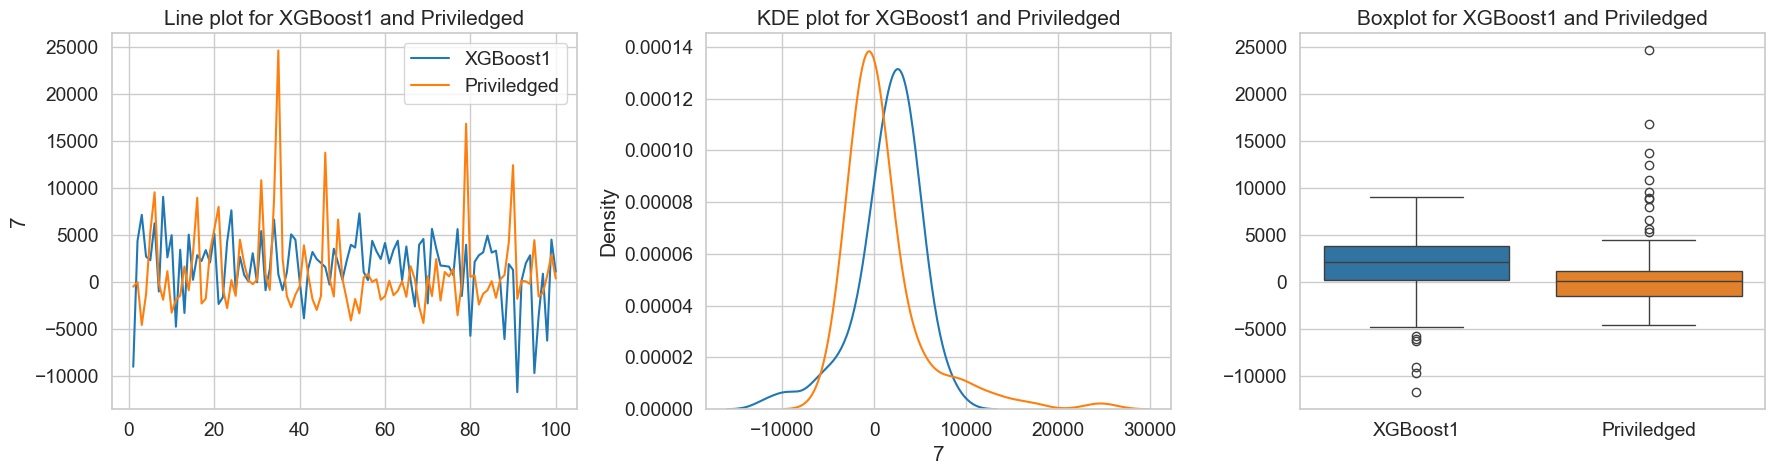

In [9]:
xgboost1_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Define agent names for easier access and readability
agent_names = ["Random", "Leader_Wins", "Underdog", "Back_Favourite", "Linex", "Priviledged"]

# Setting style and text scale for seaborn plots
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)  # Adjust the font_scale to increase text size

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally with modified height
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Decreased the height from 6 to 5

    # Line plot for XGBoost and the other agent
    sns.lineplot(data=xgboost1_avg_balance, ax=axes[0], label='XGBoost1')
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f'Line plot for XGBoost1 and {agent_name}')

    # KDE plot for the distributions
    sns.kdeplot(xgboost1_avg_balance, ax=axes[1], label='XGBoost1')
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f'KDE plot for XGBoost1 and {agent_name}')

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost1_avg_balance.rename('XGBoost1'), 
                               other_agent_balance.rename(agent_name)], axis=1)
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f'Boxplot for XGBoost1 and {agent_name}')
    
    plt.tight_layout()
    plt.show()